In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ross as rs

In [78]:
steel = rs.materials.steel

In [103]:
number_of_elements = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 40, 60]

In [104]:
def create_rotor(n_el):
    """Create example rotor with given number of elements."""
    shaft = [
        rs.ShaftElement(1.2/(n_el), i_d=0.03, o_d=0.08, material=steel)
        for i in range(n_el)
    ]

    disks = [
        rs.DiskElement.from_geometry(n=(n_el / 2), material=steel,
                                     width=0.08, i_d=0.08, o_d=0.4)
    ]

    bearings = [
        rs.BearingElement(0, kxx=1e15, cxx=0),
        rs.BearingElement(n_el, kxx=1e15, cxx=0)
    ]
    
    return rs.Rotor(shaft, disks, bearings, sparse=False)

In [106]:
def analysis(speed):
    """Perform convergence analysis for a given speed."""
    # create reference rotor with 80 elements
    rotor_80 = create_rotor(80)
    rotor_80.w = speed
    rotor_80.run()

    n_eigen = 8 
    errors = np.zeros([len(number_of_elements), n_eigen])

    for i, n_el in enumerate(number_of_elements):
        rotor = create_rotor(n_el)
        rotor.w = speed
        rotor.run()
        errors[i, :] = abs(
            100 * (rotor.wn[:n_eigen] - rotor_80.wn[:n_eigen]) 
            / rotor_80.wn[:n_eigen])
        
    fig, ax = plt.subplots()
    for i in range(8):
        ax.semilogy(number_of_elements, errors[:, i])

To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry,

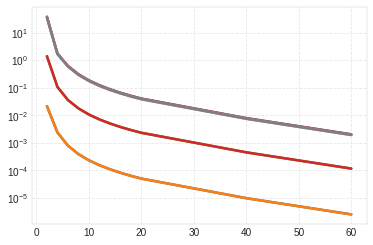

In [108]:
analysis(speed=0)

To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()
To check the rotor geometry,

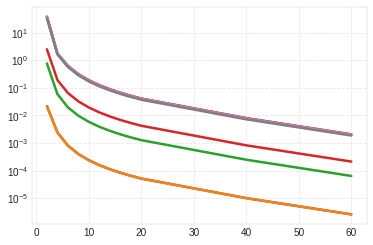

In [109]:
analysis(speed=500)